In [1]:

import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


# Select a dataset

We'll work with a dataset of 150 different flowers, or 50 each from three different species of iris (*Iris setosa*, *Iris versicolor*, and *Iris virginica*).

![tut4_iris](https://storage.googleapis.com/kaggle-media/learn/images/RcxYYBA.png)

# Load and examine the data

Each row in the dataset corresponds to a different flower.  There are four measurements: the sepal length and width, along with the petal length and width.  We also keep track of the corresponding species. 

In [2]:
# Path of the file to read
iris_filepath = "../input/iris.csv"

# Read the file into a variable iris_data
iris_data = pd.read_csv(iris_filepath, index_col="Id")

# Print the first 5 rows of the data
iris_data.head()

Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  Petal Width (cm)  \
Id                                                                             
1                 5.1               3.5                1.4               0.2   
2                 4.9               3.0                1.4               0.2   
3                 4.7               3.2                1.3               0.2   
4                 4.6               3.1                1.5               0.2   
5                 5.0               3.6                1.4               0.2   

        Species  
Id               
1   Iris-setosa  
2   Iris-setosa  
3   Iris-setosa  
4   Iris-setosa  
5   Iris-setosa

# Histograms

Say we would like to create a **histogram** to see how petal length varies in iris flowers.  We can do this with the `sns.histplot` command.  

<AxesSubplot:xlabel='Petal Length (cm)', ylabel='Count'>

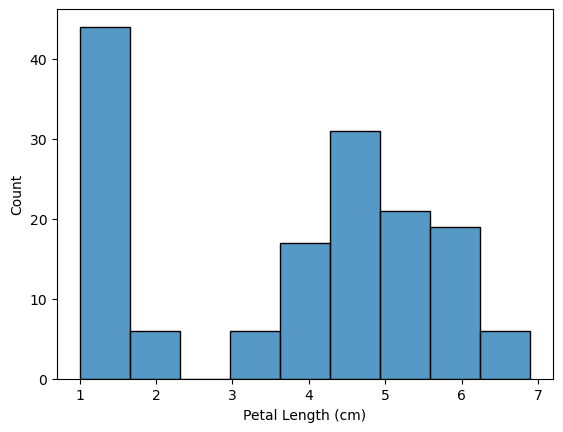

In [3]:
# Histogram 
sns.histplot(iris_data['Petal Length (cm)'])

In the code cell above, we had to supply the command with the column we'd like to plot (_in this case, we chose `'Petal Length (cm)'`_).

# Density plots

The next type of plot is a **kernel density estimate (KDE)** plot.  In case you're not familiar with KDE plots, you can think of it as a smoothed histogram.   

To make a KDE plot, we use the `sns.kdeplot` command.  Setting `shade=True` colors the area below the curve (_and `data=` chooses the column we would like to plot_).

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  


<AxesSubplot:xlabel='Petal Length (cm)', ylabel='Density'>

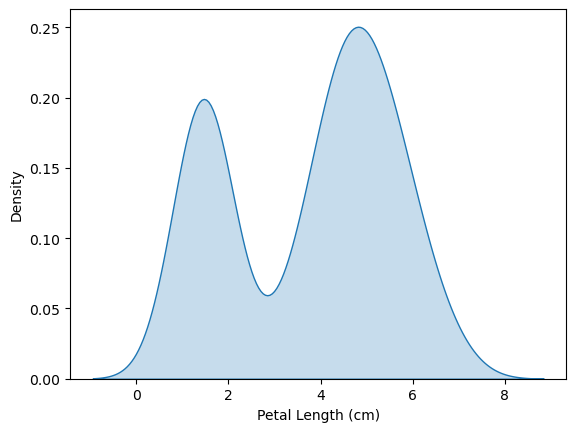

In [4]:
# KDE plot 
sns.kdeplot(data=iris_data['Petal Length (cm)'], shade=True)

# 2D KDE plots

We're not restricted to a single column when creating a KDE plot.  We can create a **two-dimensional (2D) KDE plot** with the `sns.jointplot` command.

In the plot below, the color-coding shows us how likely we are to see different combinations of sepal width and petal length, where darker parts of the figure are more likely. 

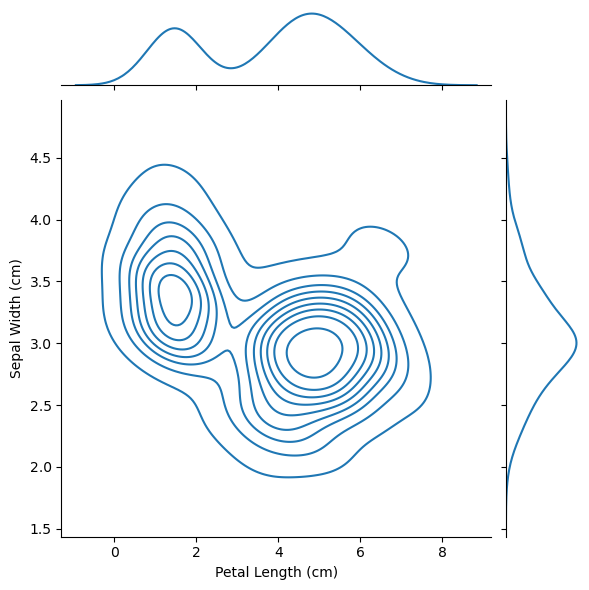

In [5]:
# 2D KDE plot
sns.jointplot(x=iris_data['Petal Length (cm)'], y=iris_data['Sepal Width (cm)'], kind="kde")

Note that in addition to the 2D KDE plot in the center,
- the curve at the top of the figure is a KDE plot for the data on the x-axis (in this case, `iris_data['Petal Length (cm)']`), and
- the curve on the right of the figure is a KDE plot for the data on the y-axis (in this case, `iris_data['Sepal Width (cm)']`).

# Color-coded plots

For the next part of the tutorial, we'll create plots to understand differences between the species.  

We can create three different histograms (one for each species) of petal length by using the `sns.histplot` command (_as above_).  
- `data=` provides the name of the variable that we used to read in the data
- `x=` sets the name of column with the data we want to plot
- `hue=` sets the column we'll use to split the data into different histograms 

Text(0.5, 1.0, 'Histogram of Petal Lengths, by Species')

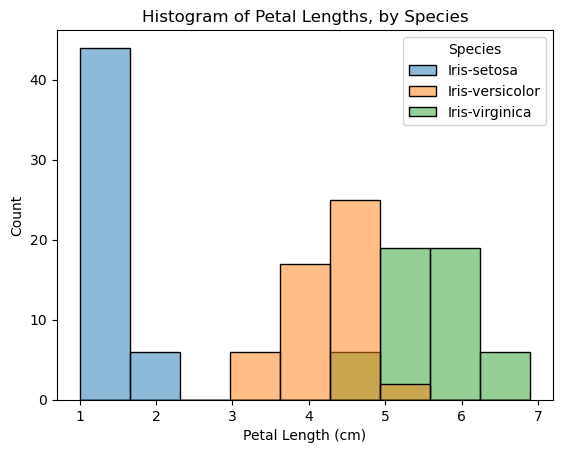

In [6]:
# Histograms for each species
sns.histplot(data=iris_data, x='Petal Length (cm)', hue='Species')

# Add title
plt.title("Histogram of Petal Lengths, by Species")

We can also create a KDE plot for each species by using `sns.kdeplot` (_as above_).  The functionality for `data`, `x`, and `hue` are identical to when we used `sns.histplot` above.  Additionally, we set `shade=True` to color the area below each curve.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  


Text(0.5, 1.0, 'Distribution of Petal Lengths, by Species')

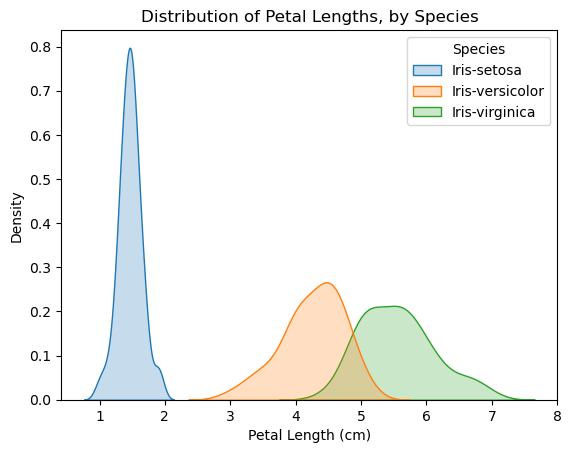

In [7]:
# KDE plots for each species
sns.kdeplot(data=iris_data, x='Petal Length (cm)', hue='Species', shade=True)

# Add title
plt.title("Distribution of Petal Lengths, by Species")

One interesting pattern that can be seen in plots is that the plants seem to belong to one of two groups, where _Iris versicolor_ and _Iris virginica_ seem to have similar values for petal length, while _Iris setosa_ belongs in a category all by itself. 

In fact, according to this dataset, we might even be able to classify any iris plant as *Iris setosa* (as opposed to *Iris versicolor* or *Iris virginica*) just by looking at the petal length: if the petal length of an iris flower is less than 2 cm, it's most likely to be *Iris setosa*!